In [1]:
import csv
import pandas as pd
pd.set_option('display.max_columns', 500)

import re
from typing import List, Any, Union

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hgnc_title_list: List[str] = ['HGNC ID', 'Approved Name', 'Status',
                   'Previous Symbols', 'Synonyms', 'Chromosone', 'Accession Numbers',
                   'RefSeq IDs', 'OMIM ID', 'Ensembl ID', 'UCSC ID']
cosmic_title_list = ['Gene name', 'Accession Number', 'Gene', 'CDS length', 'HGNC ID',
                     'Sample name', 'ID_sample', 'ID_tumour', 'Primary site',
                     'Site subtype 1', 'Site subtype 2', 'Site subtype 3',
                     'Primary histology', 'Histology subtype 1',
                     'Histology subtype 2', 'Histology subtype 3',
                     'Genome-wide screen', 'Mutation ID', 'Mutation CDS', 'Mutation',
                     'AA Mutation Description', 'Mutation zygosity', 'LOH', 'GRCh',
                     'Mutation genome position', 'Mutation strand SNP', 'Resistance',
                     'Mutation', 'FATHMM prediction', 'FATHMM score',
                     'Mutation somatic status', 'Pubmed_PMID', 'ID_STUDY',
                     'Sample Type', 'Tumour']

In [3]:
# cosmic_df = pd.read_pickle('cosmic_pkl')
# cosmic_df.head()

In [4]:
%%time
mutation_aa = pd.read_pickle('mutation_aa_pkl')

CPU times: user 49.5 s, sys: 39.3 s, total: 1min 28s
Wall time: 1min 43s


In [5]:
mutation_aa.head()

,Gene name,Accession Number,Gene CDS length,HGNC ID,Sample name,ID_sample,ID_tumour,Primary site,Site subtype 1,Site subtype 2,Site subtype 3,Primary histology,Histology subtype 1,Histology subtype 2,Histology subtype 3,Genome-wide screen,Mutation ID,Mutation CDS,Mutation Description,Mutation zygosity,LOH,GRCh,Mutation genome position,Mutation strand,SNP,Resistance Mutation,FATHMM prediction,FATHMM score,Mutation somatic status,Pubmed_PMID,ID_STUDY,Sample Type,Tumour origin,Age
Mutation AA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
p.,[ATG2A],[ENST00000377264],[5817],[29028],[TCGA-04-1342-01],[1475018],[1398717],[ovary],[NS],[NS],[NS],[carcinoma],[serous_carcinoma],[NS],[NS],[y],[COSM133562],[c.2433_2435CAG>TGA],[Substitution - coding silent],[nan],[u],[38.0],[11:64907820-64907822],[-],[nan],[-],[nan],[nan],[Confirmed somatic variant],[21720365.0],[331.0],[NS],[primary],[80.0]
p.(1408_1410)ins(6),[EP300],[ENST00000263253],[7245],[3373],[BrCa8],[1523929],[1446300],[breast],[NS],[NS],[NS],[carcinoma],[NS],[NS],[NS],[n],[COSM96435],[c.(4024_4026)ins(18)],[Insertion - In frame],[nan],[u],[nan],[nan],[nan],[nan],[-],[nan],[nan],[Confirmed somatic variant],[10700188.0],[nan],[surgery fresh/frozen],[primary],[nan]
p.(1_359)ins(4),[CEBPA],[ENST00000498907],[1077],[1833],[1209890],[1209890],[1121767],[haematopoietic_and_lymphoid_tissue],[NS],[NS],[NS],[haematopoietic_neoplasm],[acute_myeloid_leukaemia],[NS],[NS],[n],[COSM34087],[c.(1_1077)ins(12)],[Insertion - In frame],[nan],[u],[nan],[nan],[nan],[nan],[-],[nan],[nan],[Variant of unknown origin],[18616509.0],[nan],[blood-bone marrow],[NS],[nan]
p.(200_201)ins?,[TP53],[ENST00000269305],[1182],[11998],[PT297],[1600617],[1520534],[lung],[NS],[NS],[NS],[carcinoma],[non_small_cell_carcinoma],[NS],[NS],[n],[COSM133662],[c.?],[Insertion - In frame],[nan],[u],[nan],[nan],[nan],[nan],[-],[nan],[nan],[Variant of unknown origin],[22089114.0],[nan],[surgery fresh/frozen],[NS],[nan]
p.(2287)fs,[ARID1A],[ENST00000324856],[6858],[11110],[1761993],[1761993],[1666511],[haematopoietic_and_lymphoid_tissue],[NS],[NS],[NS],[lymphoid_neoplasm],[lymphoplasmacytic_lymphoma],[NS],[NS],[n],[COSM328014],[c.6746_6747ins?],[Insertion - Frameshift],[nan],[u],[38.0],[1:26780644-26780645],[+],[nan],[-],[nan],[nan],[Confirmed somatic variant],[22931316.0],[nan],[blood-bone marrow],[NS],[nan]


In [6]:
%%time
mutation_cds = pd.read_pickle('mutation_cds_pkl')
# mutation_cds.head()

CPU times: user 41.2 s, sys: 1min 16s, total: 1min 57s
Wall time: 2min 43s


In [7]:
%%time
gene_df = pd.read_pickle('gene_pkl')
# gene_df.head()

CPU times: user 14.7 s, sys: 5.59 s, total: 20.2 s
Wall time: 27.7 s


In [8]:
%%time
hgnc_df = pd.read_pickle('hgnc_pkl')
# hgnc_df.head()

CPU times: user 234 ms, sys: 90.2 ms, total: 324 ms
Wall time: 596 ms


In [9]:
def is_query_valid(query):
    cds = None 
    aa = None 
    lst = query.split()
    gene_name = lst[0]
    if gene_name not in gene_df.index:
        print('Please enter a valid gene name')
    
    for element in lst[1:]:
        if element[:2] == 'c.':
            cds = element 
        elif element[:2] == 'p.':
            aa = element 
   
    if cds is not None and cds not in gene_df.loc[gene_name]['Mutation CDS']:
        print('CDS sequence does not match')
    if aa is not None and aa not in gene_df.loc[gene_name]['Mutation AA']:
        print('AA sequence does not match')
     
    local_df = None
    sequence = None
    if cds is not None: 
        local_df = mutation_cds
        sequence = cds 
    elif aa is not None: 
        local_df = mutation_aa
        sequence = aa   
        
    return gene_name, aa, cds, local_df, sequence

In [10]:
def find_frequencies(query : str):
    
    try:   
        gene_name, aa, cds, local_df, sequence = is_query_valid(query)
        if aa is None and cds is None:
            return 'Please enter in a CDS or AA sequence'
        reply = pd.Series(local_df.loc[sequence, 'Primary histology']
                         ).value_counts()
        print(reply)
        # only graphs the ten most commonly seen tumors 
        reply[:10].plot(kind = 'bar')
    except KeyError:
        return 'Your CDS or AA sequence ' + sequence + ' was not found'
    except ValueError:
        return 

Valid queries:

* GeneName c_sequence 
* GeneName p_sequence
* GeneName c_sequence p_sequence
* GeneName p_sequence c_sequence

Anticipated invalid queries:
* GeneName
* Any combination of the above, where c_sequence and/or p_sequence do not match gene name

adenoma    1
dtype: int64


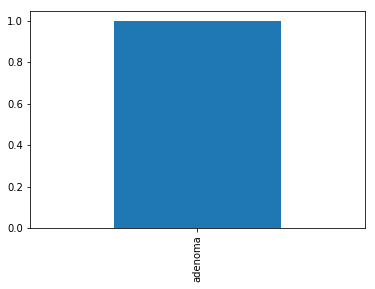

In [11]:
find_frequencies('APC c.1859_1862delTTAC p.Y622fs*7')

adenoma    1
dtype: int64


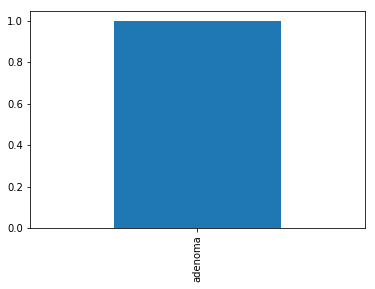

In [12]:
find_frequencies('APC p.Y622fs*7 c.1859_1862delTTAC')

adenoma                         1
adrenal_cortical_hyperplasia    1
dtype: int64


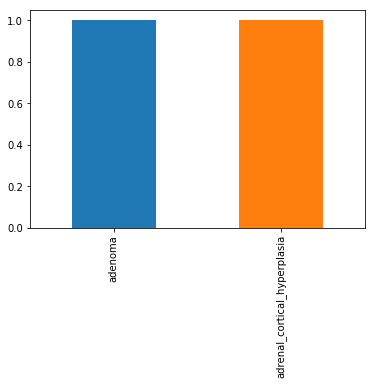

In [13]:
find_frequencies('APC p.Y622fs*7')

adenoma    1
dtype: int64


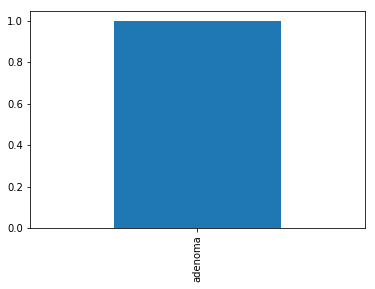

In [14]:
find_frequencies('APC c.1859_1862delTTAC')

In [15]:
find_frequencies('c.1859_1862delTTAC')

Please enter a valid gene name


'Please enter in a CDS or AA sequence'

In [16]:
find_frequencies('APC')

'Please enter in a CDS or AA sequence'

In [17]:
find_frequencies('KRAS c.XX p.XX')

CDS sequence does not match
AA sequence does not match


'Your CDS or AA sequence c.XX was not found'

carcinoma                                                     18374
malignant_melanoma                                             6080
benign_melanocytic_nevus                                        797
serrated_polyp                                                  746
lymphoid_neoplasm                                               668
glioma                                                          283
low_malignant_potential_(borderline)_tumour                     186
other                                                           176
adenoma                                                          89
craniopharyngioma                                                89
adnexal_tumour                                                   23
gastrointestinal_stromal_tumour                                  23
adenoma-nodule-goitre                                            16
haematopoietic_neoplasm                                          12
aberrant_crypt_foci                             

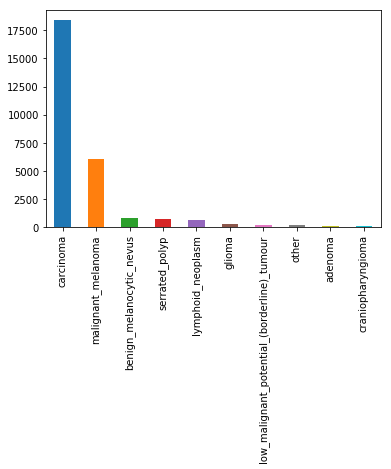

In [18]:
find_frequencies('BRAF c.1799T>A')

carcinoma                                                     32601
malignant_melanoma                                            10151
serrated_polyp                                                 2554
lymphoid_neoplasm                                              1192
benign_melanocytic_nevus                                        988
glioma                                                          410
other                                                           356
low_malignant_potential_(borderline)_tumour                     230
adenoma                                                         148
craniopharyngioma                                               100
adenoma-nodule-goitre                                            95
aberrant_crypt_foci                                              52
gastrointestinal_stromal_tumour                                  36
adnexal_tumour                                                   23
haematopoietic_neoplasm                         

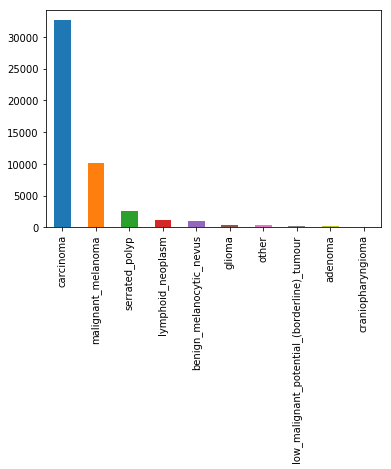

In [19]:
# melanoma, adenocarcinoma
find_frequencies('BRAF p.V600E')

In [20]:
def general_query(query: str):
    try:
        gene_name, aa, cds, local_df, sequence = is_query_valid(query)
        s = set(local_df.loc[sequence, 'HGNC ID'])
        
        if len(s) == 1:
            hgnc_id = s.pop()
            return hgnc_df[hgnc_df['HGNC ID'] == 'HGNC:863']
        else: 
            return 'This sequence maps to too many different options'
    except KeyError:
        return 'This sequence was not found'
    except ValueError:
        return 'Please enter a valid query'
    except AttributeError:
        return

In [21]:
general_query('APC c.1859_1862delTTAC p.Y622fs*7')

,HGNC ID,Approved Symbol,Approved Name,Status,Previous Symbols,Synonyms,Chromosome,Accession Numbers,RefSeq IDs,OMIM ID(supplied by OMIM),Ensembl ID(supplied by Ensembl),UCSC ID(supplied by UCSC)
44315,HGNC:863,[ATP6V0E1],[ATPase H+ transporting V0 subunit e1],[Approved],"[ATP6H, ATP6V0E]",[M9.2],[5q35.1],[Y15286],[NM_003945],[603931],[ENSG00000113732],[uc003mcd.2]


In [22]:
general_query('BRAF c.1799T>A')

'This sequence maps to too many different options'

In [23]:
general_query('APC c.1859_1862delTTAC')

,HGNC ID,Approved Symbol,Approved Name,Status,Previous Symbols,Synonyms,Chromosome,Accession Numbers,RefSeq IDs,OMIM ID(supplied by OMIM),Ensembl ID(supplied by Ensembl),UCSC ID(supplied by UCSC)
44315,HGNC:863,[ATP6V0E1],[ATPase H+ transporting V0 subunit e1],[Approved],"[ATP6H, ATP6V0E]",[M9.2],[5q35.1],[Y15286],[NM_003945],[603931],[ENSG00000113732],[uc003mcd.2]


In [24]:
general_query('BRAF c.1859_XXXXXTTAC')

CDS sequence does not match


'This sequence was not found'

In [25]:
general_query('c.?????')

Please enter a valid gene name
